# Çizgi Grafiği



In [1]:
import pandas as pd
import seaborn as sns
data=sns.load_dataset("fmri")
fmri=data.copy()

### önce veri setini taniyalim

In [2]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


>Beynin belli bölgesinden sinyaller alınır
* sunbject: kişi
* timePoint: zaman
* event: alınam şekli
* region: alınan beyin bölgesi
* signal: sinyal


In [3]:
fmri["subject"].value_counts()

s13    76
s5     76
s12    76
s11    76
s10    76
s9     76
s8     76
s7     76
s6     76
s4     76
s3     76
s2     76
s1     76
s0     76
Name: subject, dtype: int64

In [4]:
fmri["event"].value_counts()

stim    532
cue     532
Name: event, dtype: int64

In [5]:
fmri["region"].value_counts()

parietal    532
frontal     532
Name: region, dtype: int64

buradan anlaşılan 14 kişiden beynin iki farklı bölgesinden iki farklı yöntemle frekans allınmış

In [6]:
fmri["timepoint"].describe()


count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

görüldğü üzere std sapma dişinda ondalıklı ifade yok. o zma timepoint değeri kesiklidir. mutlak düzgün yani. 

istersek kategorik değişkenmiş gibide davranabiliriz

In [7]:
fmri["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

zaman noktası var frekans var. acaba her bir zaman noktasında belirli sayida sinyal mi var?

In [8]:
fmri.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [9]:
fmri.groupby("region")["signal"].count()

region
frontal     532
parietal    532
Name: signal, dtype: int64

evet tahmin edildiği gibi meknaik bir veri. beynin her iki noktasından atnı zamanda aynı sayıda sinyal alınmış

In [10]:
fmri.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


o zaman her bir sinyal uniqe okmalı dedik. öylede çıktı 1064 atır oldu

yani sinyalleri kendi içinde grupladığımızda 1064 grup oldu. zaten veri stinin kendisi de bu kadar satıra sahipti. o zaman her bir

sinyal unuqe dir.

## Çizelim :))

<AxesSubplot: xlabel='timepoint', ylabel='signal'>

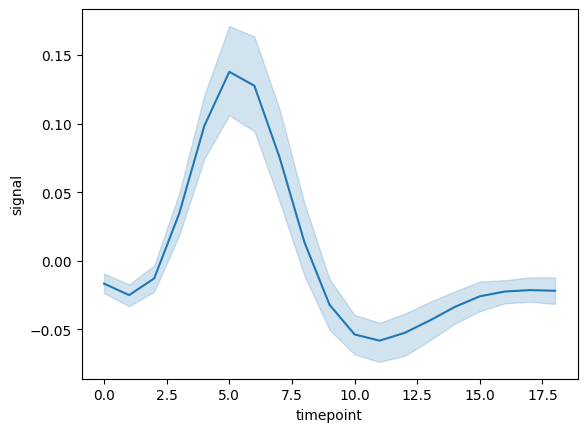

In [11]:
sns.lineplot(x="timepoint", y="signal", data=fmri)

14 kişiden 56 noktada sinyal alınmışi işte bu f-garfikteki mavi çizgi her noktada 14 kişiden alınan sinyalin ortalamasını gösteriyor.

aççı mavi kısım ise güven aralığuı oluyor

### boyut ekleme hue

<AxesSubplot: xlabel='timepoint', ylabel='signal'>

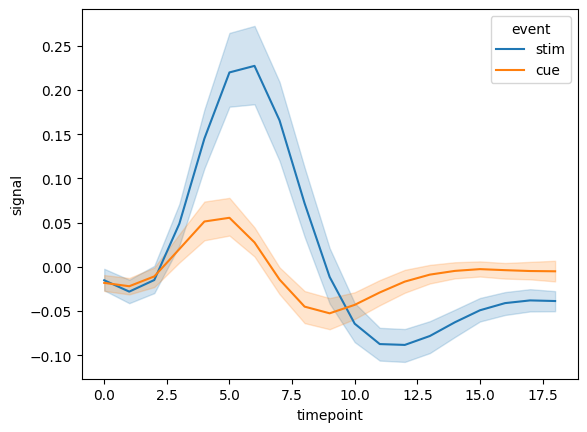

In [12]:
sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri)

### Stil ekleme

<AxesSubplot: xlabel='timepoint', ylabel='signal'>

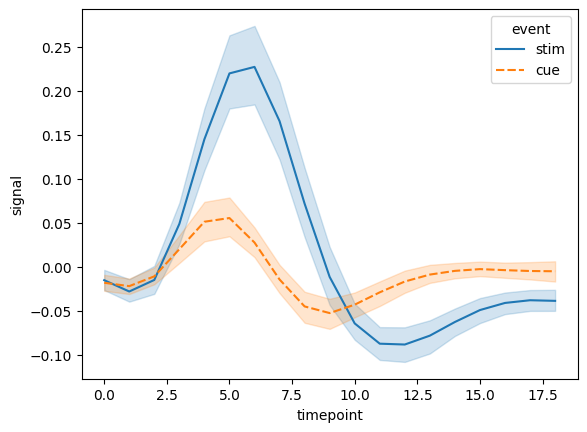

In [19]:
sns.lineplot(x="timepoint", y="signal", hue="event", style="event", data=fmri)

<AxesSubplot: xlabel='timepoint', ylabel='signal'>

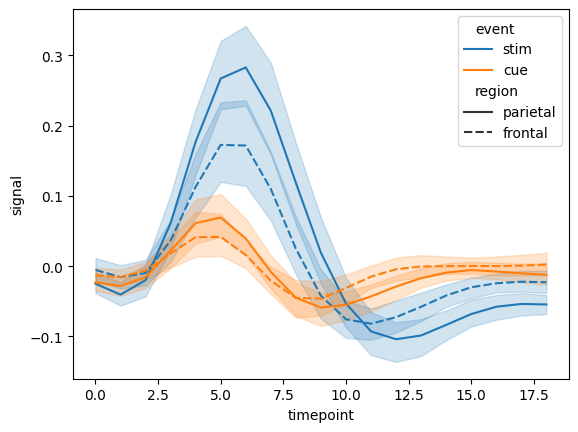

In [18]:
sns.lineplot(x="timepoint", y="signal", hue="event", style="region", data=fmri)

### işaretlemeleri değiştime Mark

<AxesSubplot: xlabel='timepoint', ylabel='signal'>

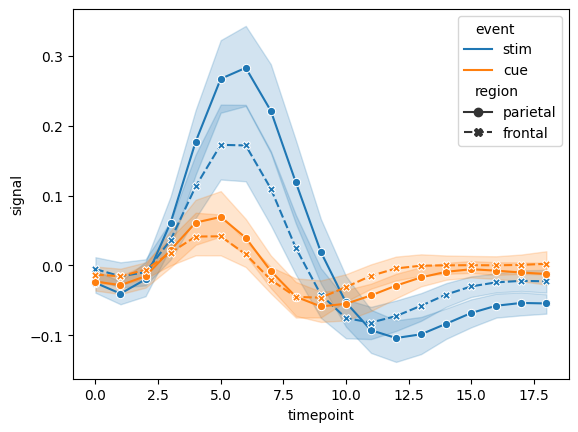

In [25]:
sns.lineplot(x="timepoint", 
    y="signal",
    hue="event", 
    style="region", 
    markers=True,
    data=fmri)

<AxesSubplot: xlabel='timepoint', ylabel='signal'>

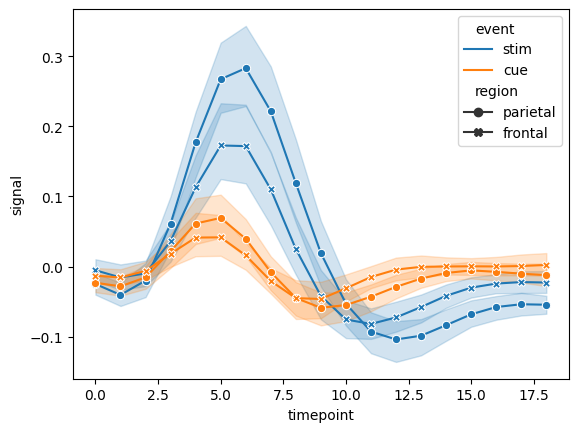

In [24]:
sns.lineplot(x="timepoint", 
    y="signal",
    hue="event", 
    style="region", 
    markers=True,
    dashes=False,
    data=fmri)